In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
mdl_train = pd.read_csv("Training.csv")
mdl_test = pd.read_csv("Testing.csv")


In [ ]:
mdl_train['prognosis'].unique()
# mdl_train.drop('Unnamed: 133', axis=1, inplace=True)

array(['Fungal_infection', 'Allergy', 'GERD', 'Chronic_cholestasis',
       'Drug_Reaction', 'Pepti_ulcer_diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial_Asthma', 'Hypertension ', 'Migraine',
       'Cervical_spondylosis', 'brain_hemorrhage', 'Jaundice', 'Malaria',
       'Chicken_pox', 'Dengue', 'Typhoid', 'hepatitis_A', 'Hepatitis_B',
       'Hepatitis_C', 'Hepatitis_D', 'Hepatitis_E', 'Alcoholic_hepatitis',
       'Tuberculosis', 'Common_Cold', 'Pneumonia', 'piles',
       'Heart_attack', 'Varicose_veins', 'Hypothyroidism',
       'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis',
       'Vertigo', 'Acne', 'Urinary_tract_infection', 'Psoriasis',
       'Impetigo'], dtype=object)

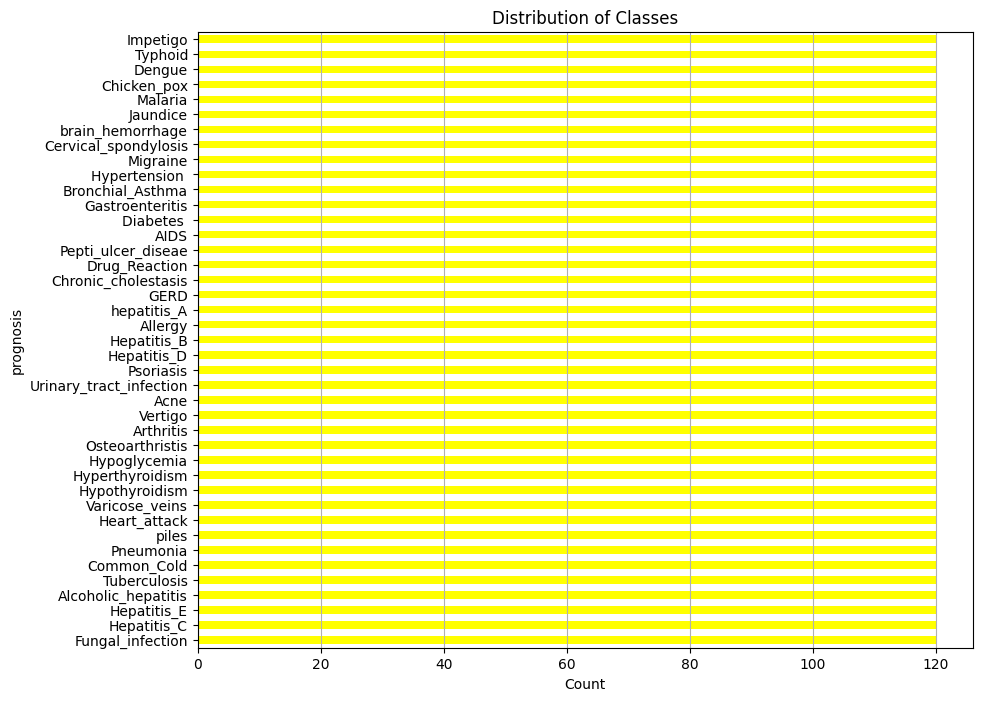

In [ ]:
class_counts = mdl_train['prognosis'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 8))
class_counts.plot(kind='barh', color='yellow')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.grid(axis='x')
plt.show()


In [ ]:
encoder = LabelEncoder()
mdl_train["diagnosis"] = encoder.fit_transform(mdl_train["prognosis"])

In [ ]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=667),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

In [8]:
y = mdl_train['diagnosis']
X = mdl_train.drop(['diagnosis', 'prognosis'], axis=1)

In [9]:
def train_models_and_evaluate(X, y, models):

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=43)

    results_list = []

    for model_name, model in models.items():
     
        model.fit(X_train, y_train)

      
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)


        train_accuracy = accuracy_score(y_train, y_train_pred)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)

     
        results_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': valid_accuracy
        })


    results_df = pd.DataFrame(results_list)
    
    return results_df

In [10]:
results_df = train_models_and_evaluate(X, y, classification_models)
results_df

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Gradient Boosting,1.0,1.0
4,SVM,1.0,1.0
5,K-Nearest Neighbors,1.0,1.0
6,Naive Bayes,1.0,1.0
7,Neural Network,1.0,1.0


In [11]:
encoder = LabelEncoder()
mdl_test["diagnosis"] = encoder.fit_transform(mdl_test["prognosis"])

In [12]:
y_test = mdl_test['diagnosis']
X_test = mdl_test.drop(['diagnosis', 'prognosis'], axis=1)

In [13]:
model = LogisticRegression()
model.fit(X, y) 
y_test_preds = model.predict(X_test)

predicted_labels = encoder.inverse_transform(y_test_preds)

mdl_test['predicted_diagnosis'] = predicted_labels

mdl_test.to_csv("Testing_with_Predictions.csv", index=False)

In [14]:
acc_score = accuracy_score(y_test, y_test_preds)
print(f"The Accuracy for Test Data is: {acc_score * 100}%.")

The Accuracy for Test Data is: 97.67441860465115%.


In [15]:
import pickle

In [16]:
with open('TrainedModel','wb') as f :
    pickle.dump(model,f)

In [17]:
with open('TrainedModel','rb') as f:
    mp = pickle.load(f)

In [18]:
print(X_test)
mp.predict(X_test)

    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                  

array([13,  3, 14,  8, 12, 30,  0, 11, 15,  5, 21, 28,  6, 38, 26, 27,  7,
       10, 34, 39, 17, 18, 19, 20,  2, 33,  9, 31, 40, 16, 36, 24, 22, 23,
       29,  4, 37,  1, 35, 32, 25, 13, 12])